In [ ]:
from lxml import etree

In [ ]:
from typing import List, Tuple

In [ ]:
def load_sentirueval_2016(file_name: str) -> Tuple[List[str], List[str]]:
    texts = []
    labels = []
    with open(file_name, mode='rb') as fp:
        xml_data = fp.read()
    root = etree.fromstring(xml_data)
    for database in root.getchildren():
        if database.tag == 'database':
            for table in database.getchildren():
                if table.tag != 'table':
                    continue
                new_text = None
                new_label = None
                for column in table.getchildren():
                    if column.get('name') == 'text':
                        new_text = str(column.text).strip()
                        if new_label is not None:
                            break
                    elif column.get('name') not in {'id', 'twitid', 'date'}:
                        if new_label is None:
                            label_candidate = str(column.text).strip()
                            if label_candidate in {'0', '1', '-1'}:
                                new_label = 'negative' if label_candidate == '-1' else \
                                    ('positive' if label_candidate == '1' else 'neutral')
                                if new_text is not None:
                                    break
                if (new_text is None) or (new_label is None):
                    raise ValueError('File `{0}` contains some error!'.format(file_name))
                texts.append(new_text)
                labels.append(new_label)
            break
    return texts, labels

In [ ]:
texts, labels = load_sentirueval_2016('tkk_train_2016.xml')

In [ ]:
print('Number of texts is {0}, number of labels is {1}.'.format(len(texts), len(labels)))

Number of texts is 8643, number of labels is 8643.


Не спешите закрывать, всё самое интересное в конце после вашго кода

In [ ]:
import random

In [ ]:
for idx in random.choices(list(range(len(texts))), k=20):
    print('{0} => {1}'.format(labels[idx], texts[idx]))

neutral => Программы для мегафона - http://t.co/3KijVo0oAM.
positive => В Краснодарском крае Ростелеком модернизирует свое вещание.Сеть передачи данных на Кубани будет усовершенствоваться.
neutral => И оба не в Билайне  RT @Beeline_RUS: Сравнивать 3G и 4G – это как (cont) http://t.co/J5sPn7hCfo
neutral => RT @sysivofyfiny: RT @quvobejedyxu: RT @diatusop4: RT @alexzhdanov: Билайн Мегафон ТЕЛЕ 2  - а если у меня мтс  - я могу подключить твиттер…
negative => Свалю-ка я с Билайна на Мегафон с сохранением номера.
neutral => у кого как #билайн заработает отпишитесь в ленту плиз))
positive => #МегаФон провели уроки мобильной грамотности для сотрудников отделов социальной защиты населения #Владивосток http://t.co/O1C4bhm527
negative => Квартальная прибыль МТС снизилась на 17%
neutral => RT @ankosalex: Коломойский хочет национализировать "Киевстар", МТС и "Укртелеком" , ПРИЧЕМ ПРЕДПРИЯТИЯ аХМЕТКИ В ПЕРВУЮ ОЧЕРЕДЬ...http://t.…
positive => Tele2 признан самым выгодным оператором в России
neutral 

In [ ]:
positive_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'positive']
negative_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'negative']

In [ ]:
for cur in positive_tweets[:5]: print(cur)

ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0
«МегаФон» поможет контролировать расходы на Интернет за границей
УрБК, Екатеринбург, 22.07.2014. ОАО «МегаФон» стало предоставлять услуги сверхскоростной мобильной связи 4G+ еще в 14 населенных пунктах Св
«МегаФон» представил новую возможность сэкономить в роуминге
Завтра может у меня будет и Домашнее Цифровое ТВ МТС #RT


In [ ]:
for cur in negative_tweets[:5]: print(cur)

RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …
@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!
RT @f_u_c_k_y_o_u_: Билайн интернет стал полным говном
@parfenov1960 Фуфло эт ваш Мегафон.просит много,дает мало.
Вот если и хаять сеть, то МТС! Просто адский оператор какой-то!


In [ ]:
from nltk import word_tokenize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=word_tokenize)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
vectorizer.fit(texts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function word_tokenize at 0x7f83427be440>)

In [ ]:
print(vectorizer.get_feature_names()[0:20])

['!', '#', '$', '%', '&', "''", '(', ')', '*', '+', '+1000', '+100000', '+100500', '+29', '+3223', '+38', '+380682470710', '+380685302855', '+393496635324', '+41']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(len(vectorizer.get_feature_names()))

22409


In [ ]:
X = vectorizer.transform(texts)

In [ ]:
print(texts[0])

@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн


In [ ]:
print(X[0])

  (0, 1)	1
  (0, 34)	1
  (0, 85)	2
  (0, 3718)	1
  (0, 5548)	1
  (0, 7666)	1
  (0, 8031)	1
  (0, 8056)	1
  (0, 9699)	1
  (0, 10408)	1
  (0, 10644)	1
  (0, 10936)	1
  (0, 11115)	1
  (0, 12625)	1
  (0, 13317)	1
  (0, 13574)	1
  (0, 13739)	1
  (0, 15762)	1
  (0, 16482)	1
  (0, 17452)	1
  (0, 18610)	1
  (0, 18790)	1
  (0, 19650)	1


In [ ]:
print(vectorizer.get_feature_names()[6321])

sloviansk


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
transformer = TfidfTransformer().fit(X)

In [ ]:
X_transformed = transformer.transform(X)

In [ ]:
print(X_transformed[0])

  (0, 19650)	0.26299875888986046
  (0, 18790)	0.26299875888986046
  (0, 18610)	0.10146408828388184
  (0, 17452)	0.21695417251972576
  (0, 16482)	0.2342553227156964
  (0, 15762)	0.21809092613105632
  (0, 13739)	0.24553842334255976
  (0, 13574)	0.3035809551776427
  (0, 13317)	0.1606320885346372
  (0, 12625)	0.28112703879824064
  (0, 11115)	0.3035809551776427
  (0, 10936)	0.08501761562140131
  (0, 10644)	0.23830987681977872
  (0, 10408)	0.19742062464241592
  (0, 9699)	0.11865018121314932
  (0, 8056)	0.2483570832719033
  (0, 8031)	0.19996264622267618
  (0, 7666)	0.08131858735184118
  (0, 5548)	0.3035809551776427
  (0, 3718)	0.06045579452539475
  (0, 85)	0.14400722524021756
  (0, 34)	0.06545680265405714
  (0, 1)	0.07888400172040888


In [ ]:
print(vectorizer.get_feature_names()[19056])

систематическому


In [ ]:
tokens_with_IDF = list(zip(vectorizer.get_feature_names(), transformer.idf_))

In [ ]:
for feature, idf in tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

3.135104 => !
2.435131 => #
7.499671 => $
4.958675 => %
4.689342 => &
3.341991 => ''
4.111377 => (
3.533743 => )
6.509273 => *
6.509273 => +
9.371474 => +1000
9.371474 => +100000
9.371474 => +100500
9.371474 => +29
9.371474 => +3223
9.371474 => +38
9.371474 => +380682470710
8.966008 => +380685302855
9.371474 => +393496635324
9.371474 => +41


In [ ]:
sorted_tokens_with_IDF = sorted(tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [ ]:
for feature, idf in sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.371474 => +1000
9.371474 => +100000
9.371474 => +100500
9.371474 => +29
9.371474 => +3223
9.371474 => +38
9.371474 => +380682470710
9.371474 => +393496635324
9.371474 => +41
9.371474 => +575385427871
9.371474 => +7-965-77-00-123
9.371474 => +77711190926
9.371474 => +77777777
9.371474 => +79111812983
9.371474 => +79176389635
9.371474 => +79261221746
9.371474 => +7961
9.371474 => +79633071770
9.371474 => +79787246609
9.371474 => +79871547330


In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2

In [ ]:
selector = SelectPercentile(chi2, percentile=20)

In [ ]:
selector.fit(X_transformed, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f833fd14f80>)

In [ ]:
selected_tokens_with_IDF = [tokens_with_IDF[idx] for idx in selector.get_support(indices=True)]

In [ ]:
print(len(selected_tokens_with_IDF))

4482


In [ ]:
for feature, idf in selected_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

3.135104 => !
2.435131 => #
4.111377 => (
3.533743 => )
6.509273 => *
2.020636 => ,
3.924736 => -
9.371474 => -.-
9.371474 => -400
8.966008 => -60
8.966008 => -а
9.371474 => -больше
9.371474 => -всем
9.371474 => -днище
8.966008 => -нет
8.966008 => -р
2.222735 => .
5.293936 => ..
3.890835 => ...
9.371474 => .обращался


In [ ]:
selected_and_sorted_tokens_with_IDF = sorted(selected_tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [ ]:
for feature, idf in selected_and_sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.371474 => -.-
9.371474 => -400
9.371474 => -больше
9.371474 => -всем
9.371474 => -днище
9.371474 => .обращался
9.371474 => .по
9.371474 => //t.co/00bl3i5jcr
9.371474 => //t.co/05glrrkgts
9.371474 => //t.co/0goumiymfp
9.371474 => //t.co/0gu4icqawy
9.371474 => //t.co/0hvcqrzoff
9.371474 => //t.co/0lhfaaxm0s
9.371474 => //t.co/0nsdxtnisn
9.371474 => //t.co/0wqsc7cdsb
9.371474 => //t.co/1acc8yqo3f
9.371474 => //t.co/1jkxvwpeno
9.371474 => //t.co/1t59pncgpg
9.371474 => //t.co/26v61xerrs
9.371474 => //t.co/2esb44hmbf


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
X_transformed_and_selected = selector.transform(X_transformed)

In [ ]:
cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
classes_list = list(cls.classes_)

In [ ]:
print(classes_list)

['negative', 'neutral', 'positive']


In [ ]:
texts_for_testing, labels_for_testing = load_sentirueval_2016('tkk_test_etalon.xml')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls)
    ]
)

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

In [ ]:
probabilities = pipeline_for_se.predict_proba(texts_for_testing)

In [ ]:
y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]

In [ ]:
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

In [ ]:
y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

In [ ]:
y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

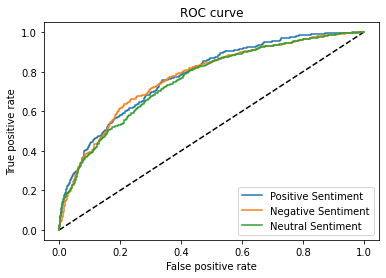

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
predicted_labels = pipeline_for_se.predict(texts_for_testing)
print('F1-micro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='micro')))
print('F1-macro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='macro')))

F1-micro = 0.656431
F1-macro = 0.494411


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_for_testing, predicted_labels, digits=6))

              precision    recall  f1-score   support

    negative   0.713355  0.635397  0.672123      1034
     neutral   0.618755  0.795455  0.696066      1012
    positive   0.520000  0.064677  0.115044       201

    accuracy                       0.656431      2247
   macro avg   0.617370  0.498509  0.494411      2247
weighted avg   0.653453  0.656431  0.633074      2247



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')
cv = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_grid={'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3], 'penalty': ['l1', 'l2']},
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [ ]:
cv.fit(X_transformed_and_selected, labels)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, average=macro))

In [ ]:
print(cv.best_params_)

{'C': 100.0, 'penalty': 'l2'}


In [ ]:
best_cls = LogisticRegression(solver='liblinear', verbose=True, C=10.0, penalty='l1')
best_cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(C=10.0, penalty='l1', solver='liblinear', verbose=True)

In [ ]:
best_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', best_cls)
    ]
)

In [ ]:
probabilities = best_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

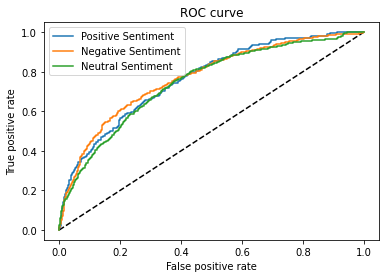

In [ ]:
plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
predicted_labels = best_pipeline_for_se.predict(texts_for_testing)
print('F1-micro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='micro')))
print('F1-macro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='macro')))

F1-micro = 0.648865
F1-macro = 0.548723


In [ ]:
print(classification_report(labels_for_testing, predicted_labels, digits=6))

              precision    recall  f1-score   support

    negative   0.715247  0.617021  0.662513      1034
     neutral   0.620192  0.764822  0.684956      1012
    positive   0.429907  0.228856  0.298701       201

    accuracy                       0.648865      2247
   macro avg   0.588448  0.536900  0.548723      2247
weighted avg   0.646912  0.648865  0.640077      2247



Итак, попробуем сделать алгортим лучше и посмотрим, что получится. Начнём с лемматизации и токенезации

In [ ]:
! pip install spacy-udpipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy_udpipe

spacy_udpipe.download("ru")
nlp = spacy_udpipe.load("ru")
doc = nlp("Мама мыла раму")
for token in doc:
  print(token.text, token.lemma_)

Already downloaded a model for the 'ru' language
Мама мама
мыла мыть
раму рама


In [ ]:
def my_lemma_tokenize(text:str) -> List[str]:
  list_of_words = []
  doc = nlp(text)
  for token in doc:
    list_of_words.append(token.lemma_)
  return list_of_words

In [ ]:
my_lemma_tokenize('Я пишу программу')

['я', 'писать', 'программа']

In [ ]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=my_lemma_tokenize) 

In [ ]:
vectorizer.fit(texts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function my_lemma_tokenize at 0x7f833faa6830>)

In [ ]:
print(vectorizer.get_feature_names()[0:50])

['!', '!&gt', '!»', '!е', '"', '#', '#+41', '#100skfo', '#1042', '#1055;', '#1074;', '#1076', '#1077', '#1086', '#160', '#171', '#187', '#2013од', '#2014', '#3g', '#40', '#41', '#4g', '#4g+', '#752', '#8211', '#8220', '#8221', '#8230', '#97фз', '#apple', '#e586', '#edge', '#exprussia', '#f', '#gprs', '#gsm', '#gtav', '#hope', '#htc', '#ipad', '#iphone', '#iphone5', '#job', '#k', '#kazan', '#krsk', '#me', '#megafon', '#megafoн-лат']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(len(vectorizer.get_feature_names()))

16749


In [ ]:
X = vectorizer.transform(texts)

Добавим в матрицу показатели наличия ссылки на канал и тональность (0-отрицательная, 0,5-нейтральная, 1-положительная)


In [ ]:
import re

tg_channel = re.compile('(http[s]?:)?\/\/t\.co')
tg_tweets = []
tg_labels = []
for idx in range(len(texts)):
  if tg_channel.search(texts[idx]) is not None:
    tg_tweets.append(texts[idx])
    tg_labels.append(labels[idx])

In [ ]:
with open("RuSentiLex.txt", "r", encoding="utf-8") as file:
  positive_list=[]
  negative_list=[]
  neutral_list=[]
  for row in file.readlines():
    if row[0] == '!':
      pass
    else:
      row = row.split(', ')
      if 'positive' in row:
        positive_list.append(row[0])
      elif 'negative' in row:
        negative_list.append(row[0])
      elif 'neutral' in row:
        neutral_list.append(row[0])


Теперь нужно проверить, как посчитанная тональность соотносится с уже готовым списком окрашенной лексики

In [ ]:
c=0
for idx in range(len(texts)):
  doc = nlp(texts[idx].lower())
  positive=0
  negative=0
  neutral=0
  for token in doc:
    lemma=token.lemma_
    if lemma in positive_list:
      positive+=1
    if lemma in negative_list:
      negative+=1
    if lemma in neutral_list:
      neutral+=1
  emo_score = list(zip([k/len(doc) for k in [positive, negative, neutral]], ["positive", "negative", "neutral"]))
  for duo in emo_score:
    if duo[0] == max([i[0] for i in emo_score]):
      if duo[1] == labels[idx]:
        c+=1
print(c/len(texts))

1.0


Впечатляет

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer().fit(X)
X_transformed = transformer.transform(X) 
print(f'Матрица:\nномер токена в словаре - tf слова\n{X_transformed[0]}')

Матрица:
номер токена в словаре - tf слова
  (0, 14928)	0.23808175540682783
  (0, 14452)	0.27012454380074863
  (0, 14328)	0.10924358322455263
  (0, 13643)	0.20532754166257977
  (0, 13160)	0.21339284592694815
  (0, 12792)	0.23711952479413687
  (0, 11591)	0.20298715533553888
  (0, 11502)	0.2480943351734739
  (0, 11342)	0.1560439607941433
  (0, 10899)	0.33213498488737664
  (0, 9938)	0.33213498488737664
  (0, 9818)	0.09713357385696253
  (0, 9646)	0.27012454380074863
  (0, 9506)	0.22575707141902923
  (0, 9085)	0.13555777941411548
  (0, 8510)	0.14444127443866836
  (0, 8072)	0.16423029507059134
  (0, 7803)	0.09220334363258813
  (0, 2409)	0.347154951533728
  (0, 250)	0.15495162558867978
  (0, 165)	0.07533080118136379
  (0, 5)	0.09208953771897561


In [ ]:
X_arr = X_transformed.toarray()
n,m = X_arr.shape
print(n,m)

8643 16749


In [ ]:
tg_channel = re.compile('(http[s]?:)?\/\/t\.co')
X0 = np.zeros((n, 1))
for idx in range(len(texts)):
  if tg_channel.search(texts[idx]) is not None:
    X0[idx] = 1

Xnew = np.hstack((X_arr,X0))
print(Xnew)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X1 = np.zeros((n, 1))
for idx in range(len(texts)):
  doc = nlp(texts[idx].lower())
  positive=0
  negative=0
  neutral=0
  for token in doc:
    lemma=token.lemma_
    if lemma in positive_list:
      positive+=1
    if lemma in negative_list:
      negative+=1
    if lemma in neutral_list:
      neutral+=1
  emo_score = list(zip([k/len(doc) for k in [positive, negative, neutral]], ["positive", "negative", "neutral"]))
  for duo in emo_score:
    if max([i for i in emo_score]) != 0:
      if duo[0] == max([i[0] for i in emo_score]) and duo[0] != 0:
        if duo[1] == "positive":
          X1[idx] = 1
        elif duo[1] == "negative":
          X1[idx] = 0
        elif duo[1] == "neutral":
          X1[idx] = 0.5
    else:
      X1[idx] = 0.5

Xnew = np.hstack((Xnew,X1))
print(Xnew)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Пора учиться

Логистическая регрессия с “пакетной” градиентной оптимизацей при обучении с подбором гиперпараметров с помощью перебора

In [ ]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
selector = SelectPercentile(chi2, percentile=20)

In [ ]:
selector.fit(Xnew, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f833fd14f80>)

In [ ]:
tokens_with_IDF = list(zip(vectorizer.get_feature_names(), transformer.idf_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
for feature, idf in tokens_with_IDF[0:50]: print('{0:.6f} => {1}'.format(idf, feature))

3.141977 => !
9.371474 => !&gt
8.966008 => !»
9.371474 => !е
3.312350 => "
2.485964 => #
9.371474 => #+41
9.371474 => #100skfo
9.371474 => #1042
9.371474 => #1055;
9.371474 => #1074;
9.371474 => #1076
9.371474 => #1077
8.966008 => #1086
9.371474 => #160
8.678326 => #171
8.678326 => #187
9.371474 => #2013од
8.966008 => #2014
8.455183 => #3g
8.455183 => #40
9.371474 => #41
7.425563 => #4g
8.455183 => #4g+
9.371474 => #752
9.371474 => #8211
9.371474 => #8220
9.371474 => #8221
6.886567 => #8230
9.371474 => #97фз
9.371474 => #apple
9.371474 => #e586
8.966008 => #edge
9.371474 => #exprussia
9.371474 => #f
9.371474 => #gprs
9.371474 => #gsm
9.371474 => #gtav
9.371474 => #hope
8.966008 => #htc
8.678326 => #ipad
8.272861 => #iphone
9.371474 => #iphone5
9.371474 => #job
8.966008 => #k
9.371474 => #kazan
8.966008 => #krsk
8.966008 => #me
9.371474 => #megafon
8.966008 => #megafoн-лат


In [ ]:
sorted_tokens_with_IDF = sorted(tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [ ]:
for feature, idf in sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.371474 => !&gt
9.371474 => !е
9.371474 => #+41
9.371474 => #100skfo
9.371474 => #1042
9.371474 => #1055;
9.371474 => #1074;
9.371474 => #1076
9.371474 => #1077
9.371474 => #160
9.371474 => #2013од
9.371474 => #41
9.371474 => #752
9.371474 => #8211
9.371474 => #8220
9.371474 => #8221
9.371474 => #97фз
9.371474 => #apple
9.371474 => #e586
9.371474 => #exprussia


In [ ]:
print(len(sorted_tokens_with_IDF))

16749


In [ ]:
selector.fit(X_transformed, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f833fd14f80>)

In [ ]:
selected_tokens_with_IDF = [tokens_with_IDF[idx] for idx in selector.get_support(indices=True)]

In [ ]:
print(len(selected_tokens_with_IDF))

3350


In [ ]:
for feature, idf in selected_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

3.141977 => !
2.485964 => #
8.455183 => #4g+
9.371474 => #8211
8.966008 => #edge
9.371474 => #gsm
9.371474 => #kazan
9.371474 => #nsk
9.371474 => #rzn
8.966008 => #ua
9.371474 => #uln
8.966008 => #ulsk
7.985179 => #uzb
9.371474 => #смс
9.371474 => #ура
8.966008 => #уф
8.678326 => &lt;3
4.153824 => (
3.539591 => )
8.966008 => *


In [ ]:
selected_and_sorted_tokens_with_IDF = sorted(selected_tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [ ]:
for feature, idf in selected_and_sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.371474 => #8211
9.371474 => #gsm
9.371474 => #kazan
9.371474 => #nsk
9.371474 => #rzn
9.371474 => #uln
9.371474 => #смс
9.371474 => #ура
9.371474 => *_*
9.371474 => ,вс
9.371474 => ,есть
9.371474 => -vip
9.371474 => -ик
9.371474 => -лицный
9.371474 => -обратно
9.371474 => -олдскулы
9.371474 => -парка
9.371474 => -портать
9.371474 => -провайдер
9.371474 => -таки


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
X_transformed_and_selected = selector.transform(X_transformed)

In [ ]:
cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
classes_list = list(cls.classes_)

In [ ]:
print(classes_list)

['negative', 'neutral', 'positive']


In [ ]:
texts_for_testing, labels_for_testing = load_sentirueval_2016('tkk_test_etalon.xml')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_logreg_grid = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls)
    ]
)

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

In [ ]:
probabilities_logreg_grid = pipeline_logreg_grid.predict_proba(texts_for_testing)

In [ ]:
predicted_labels_logreg_grid = pipeline_logreg_grid.predict(texts_for_testing)

Логистическая регрессия со стохастической градиентной оптимизацей при обучении с подбором гиперпараметров с помощью перебора

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
grid_sgd = GridSearchCV(
    estimator=SGDClassifier(loss='log'),
    param_grid={'alpha': [1e-4,1e-3,1e-2, 1e-1], 'penalty': ['l1', 'l2']},
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [ ]:
from time import time

In [ ]:
before=time()
grid_sgd.fit(X_transformed_and_selected, labels)
time_passed_grid_2=time()-before

In [ ]:
grid_sgd.best_params_

{'alpha': 0.0001, 'penalty': 'l2'}

In [ ]:
cls_sgd_grid = SGDClassifier(loss='log', alpha= 0.0001, penalty= 'l1')
before=time()
cls_sgd_grid.fit(X_transformed_and_selected, labels)
time_passed_sgd_1=time()-before

In [ ]:
pipeline_sgd_grid = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls_sgd_grid)
    ]
)

In [ ]:
probabilities_sgd_grid = pipeline_sgd_grid.predict_proba(texts_for_testing)

In [ ]:
predicted_labels_sgd_grid = pipeline_sgd_grid.predict(texts_for_testing)

Логистическая регрессия с “пакетной” градиентной оптимизацей при обучении с подбором гиперпараметров с помощью Байесовской оптимизации


In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.5 MB/s 


In [ ]:
from skopt import BayesSearchCV

In [ ]:
bayes_logreg = BayesSearchCV(LogisticRegression(solver='liblinear'),
{
'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3],'penalty': ['l1', 'l2']},
n_iter=32,
random_state=0,
n_jobs=-1)

In [ ]:
before=time()
bayes_logreg.fit(X_transformed_and_selected, labels)
time_passed_bayes_1=time()-before

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

In [ ]:
bayes_logreg.best_params_

OrderedDict([('C', 100.0), ('penalty', 'l2')])

In [ ]:
cls_logreg_bayes = LogisticRegression(solver='liblinear', verbose=True, C= 100, penalty= 'l2')
before=time()
cls_logreg_bayes.fit(X_transformed_and_selected, labels)
time_passed_logreg_2=time()-before

[LibLinear]

In [ ]:
pipeline_logreg_bayes = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls_logreg_bayes)
    ]
)

In [ ]:
probabilities_logreg_bayes = pipeline_logreg_bayes.predict_proba(texts_for_testing)

In [ ]:
predicted_labels_logreg_bayes=pipeline_logreg_bayes.predict(texts_for_testing)

Логистическая регрессия со стохастической градиентной оптимизацей при обучении с подбором гиперпараметров с помощью Байесовской оптимизации


In [ ]:
bayes_sgd = BayesSearchCV(SGDClassifier(loss='log'),
{
'alpha': [1e-4,1e-3,1e-2, 1e-1],'penalty': ['l1', 'l2']},
n_iter=32,
random_state=0,
n_jobs=-1)

In [ ]:
before=time()
bayes_sgd.fit(X_transformed_and_selected,labels)
time_passed_bayes_2=time()-before

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

In [ ]:
bayes_sgd.best_params_

OrderedDict([('alpha', 0.0001), ('penalty', 'l2')])

In [ ]:
cls_sgd_bayes = SGDClassifier(loss='log', alpha=0.0001, penalty= 'l1')
before=time()
cls_sgd_bayes.fit(X_transformed_and_selected, labels)
time_passed_sgd_2=time()-before

In [ ]:
pipeline_sgd_bayes = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls_sgd_bayes)
    ]
)

In [ ]:
probabilities_sgd_bayes = pipeline_sgd_bayes.predict_proba(texts_for_testing)

In [ ]:
predicted_labels_sgd_bayes=pipeline_sgd_bayes.predict(texts_for_testing)

Сравним все 4 кривые

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def build_roc_curve(probabilities,classifier:str,parameter_search:str):
  y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
  y_score_positives = probabilities[:, classes_list.index('positive')]
  fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)
  y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
  y_score_negatives = probabilities[:, classes_list.index('negative')]
  fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)
  y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
  y_score_neutrals = probabilities[:, classes_list.index('neutral')]
  fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
  plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
  plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title(f'ROC curve for {classifier}, parameter search with {parameter_search} ')
  plt.legend(loc='best')

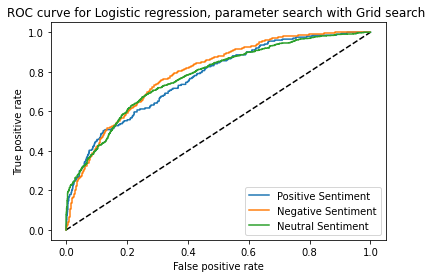

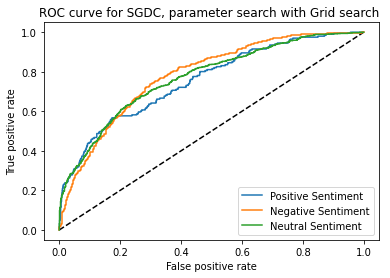

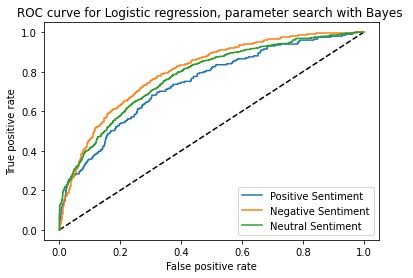

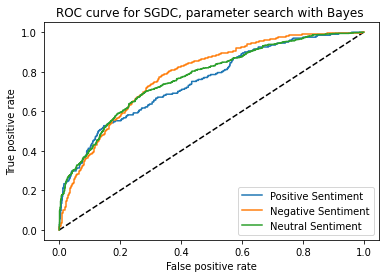

In [ ]:
plt.figure(1)
build_roc_curve(probabilities_logreg_grid,'Logistic regression','Grid search')
plt.figure(2)
plt.subplot=build_roc_curve(probabilities_sgd_grid,'SGDC','Grid search')
plt.figure(3)
plt.subplot=build_roc_curve(probabilities_logreg_bayes,'Logistic regression','Bayes')
plt.figure(4)
plt.subplot=build_roc_curve(probabilities_sgd_bayes,'SGDC','Bayes')
plt.show()

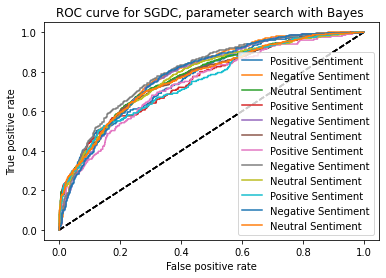

In [ ]:
build_roc_curve(probabilities_logreg_grid,'Logistic regression','Grid search')
plt.subplot=build_roc_curve(probabilities_sgd_grid,'SGDC','Grid search')
plt.subplot=build_roc_curve(probabilities_logreg_bayes,'Logistic regression','Bayes')
plt.subplot=build_roc_curve(probabilities_sgd_bayes,'SGDC','Bayes')
plt.show()

Как видим, ROC-кривые почти полностью накладываются друг на друга, то есть результаты работы разных алгоритмов довольно близки.

Сравним метрики (F1-micro и F1-macro) для всех четырёх случаев

In [ ]:
from tabulate import tabulate

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
def recall(tp:int,fn:int) ->int:
  return tp/(tp+fn)
def precision(tp:int,fp:int) ->int:
  return tp/(tp+fp)
def f1(precision:int,recall:int) ->int:
  return 2*precision*recall/(precision+recall)

In [ ]:
def count_metrics(labels_for_testing, predicted_labels:List[str]) -> Tuple[int,int]:
  cm=confusion_matrix(labels_for_testing, predicted_labels)
  negative_tp=cm[0][0]
  negative_fn=cm[0][1]+cm[0][2]
  negative_fp=cm[1][0]+cm[2][0]
  negative_recall=recall(negative_tp,negative_fn)
  negative_precision=precision(negative_tp,negative_fp)
  negative_f1=f1(negative_precision,negative_recall)
  negative_recall,negative_precision,negative_f1
  positive_tp=cm[2][2]
  positive_fn=cm[2][0]+cm[2][1]
  positive_fp=cm[0][2]+cm[1][2]
  positive_recall=recall(positive_tp,positive_fn)
  positive_precision=precision(positive_tp,positive_fp)
  positive_f1=f1(positive_precision,positive_recall)
  positive_recall,positive_precision,positive_f1
  f1_macro=(positive_f1+negative_f1)/2
  precision_micro=precision(negative_tp+positive_tp,negative_fp+positive_fp)
  recall_micro=recall(negative_tp+positive_tp,negative_fn+positive_fn)
  f1_micro=f1(precision_micro,recall_micro)
  return round(f1_macro,3), round(f1_micro,3)

In [ ]:
print(tabulate([
    ['logistic regression','grid_search',count_metrics(labels_for_testing,predicted_labels_logreg_grid)],
    ['SGDC','grid_search',count_metrics(labels_for_testing,predicted_labels_sgd_grid)],
    ['logistic regression','Bayes',count_metrics(labels_for_testing,predicted_labels_logreg_bayes)],
    ['SGDC','Bayes',count_metrics(labels_for_testing,predicted_labels_sgd_bayes)]],
    headers= ['Classifier','Parameter Search',('F1-macro','F1-micro')]))

Classifier           Parameter Search    ('F1-macro', 'F1-micro')
-------------------  ------------------  --------------------------
logistic regression  grid_search         (0.461, 0.636)
SGDC                 grid_search         (0.484, 0.631)
logistic regression  Bayes               (0.499, 0.638)
SGDC                 Bayes               (0.494, 0.638)


Метрики говорят, что эффективнее всего работает пакетная реализация оптимизации при обучении в сочетании с подбором параметров с помощью Байесовской оптимизации. F1-micro во всех случаях оказалась выше, чем F1-macro. Для того, чтобы понять почему, сформируем classification report для результатов одного из алгоритмов, например, того,для которого эта разница наиболее заметна (SGDClassifier + BayesSearchSV).

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report (labels_for_testing, predicted_labels_sgd_bayes))

              precision    recall  f1-score   support

    negative       0.69      0.68      0.69      1034
     neutral       0.65      0.73      0.69      1012
    positive       0.49      0.22      0.30       201

    accuracy                           0.66      2247
   macro avg       0.61      0.54      0.56      2247
weighted avg       0.65      0.66      0.65      2247



Итак, выводы:
1. Для определения тональности можно и нужно использовать готовые словари оценочной лексики
2. Пакетная реализация оптимизации при обучении в сочетании с подюором параметров с помощью Байесовской оптимизации дает лучший результат. 
3. Положительных твитов в 2,5 раза меньше, чем отрицательных. Положительные твиты классифицируются хуже (возможно,опять же, из-за ассиметрии классов, на что указывает низкая полнота), поэтому F1 для них ниже.